In [2]:
# Install necessary packages
!pip install matplotlib scikit-learn tensorflow



In [3]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [4]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalize the Data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
# Flatten images (28x28 -> 784)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


In [7]:
# Build the Model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

In [8]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the Model
model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8672 - loss: 0.4549 - val_accuracy: 0.9645 - val_loss: 0.1135
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9651 - loss: 0.1176 - val_accuracy: 0.9727 - val_loss: 0.0910
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9765 - loss: 0.0730 - val_accuracy: 0.9755 - val_loss: 0.0811
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9833 - loss: 0.0534 - val_accuracy: 0.9783 - val_loss: 0.0770
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0367 - val_accuracy: 0.9762 - val_loss: 0.0793
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9747 - val_loss: 0.0855
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9722 - val_loss: 0.1087
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9925 - loss: 0.0214

In [10]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0952
Test Accuracy: 0.9780


In [11]:
# Predict
y_pred = model.predict(x_test_flat)
y_pred_classes = y_pred.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 971    1    1    0    0    1    2    1    2    1]
 [   0 1125    3    2    0    0    2    0    3    0]
 [   4    0 1011    1    2    0    3    6    4    1]
 [   0    0    9  973    0    7    0    5   12    4]
 [   2    1    1    0  961    0    4    4    1    8]
 [   3    0    0    9    1  867    4    1    4    3]
 [   3    2    3    1    4    5  939    0    1    0]
 [   1    3   11    1    0    0    0 1005    2    5]
 [   3    1    6    3    2    8    2    3  942    4]
 [   2    3    0    1    4    3    0    7    3  986]]


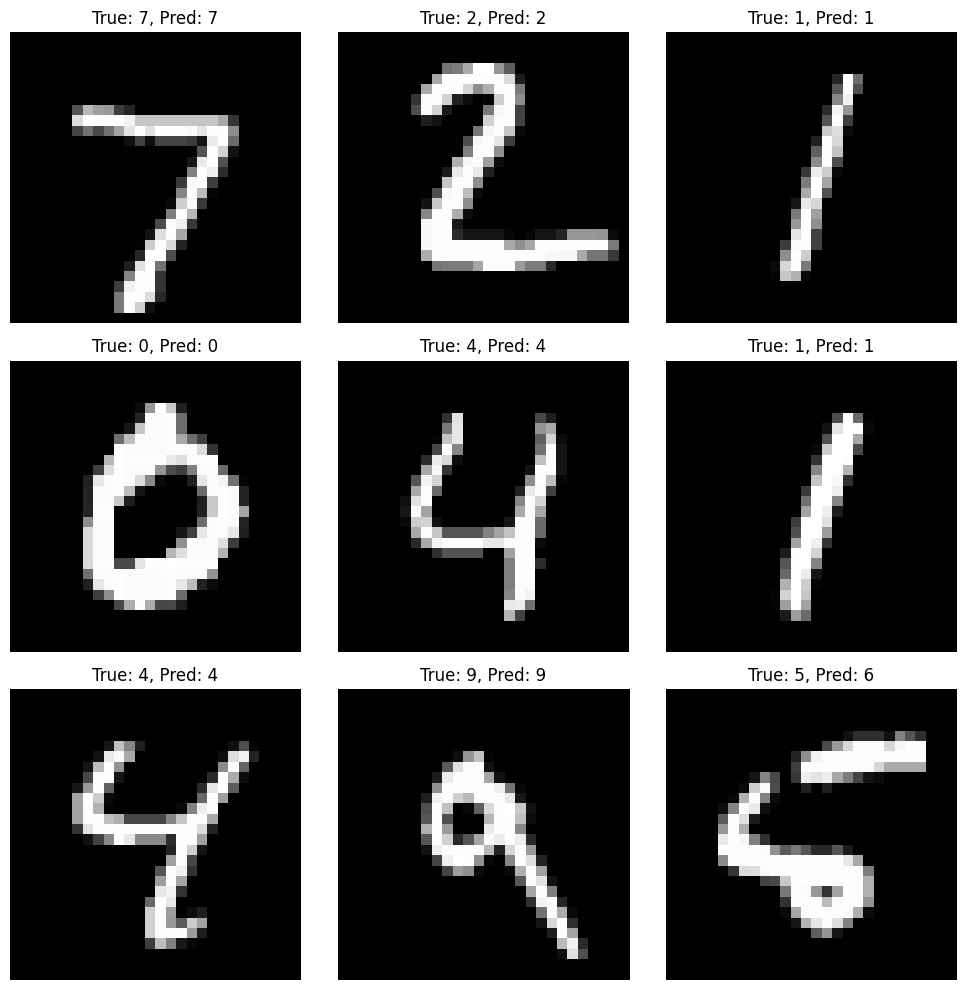

In [13]:
# Visualize Few Predictions
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()